In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
import time

# Problem 1

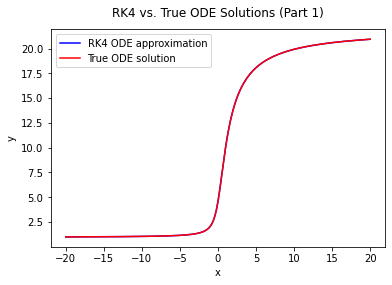

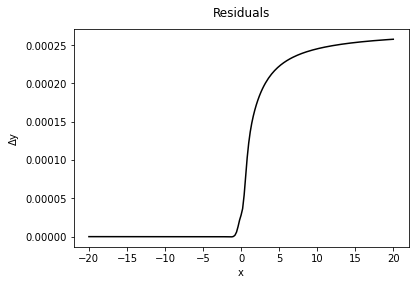

Mean of residuals 0.00011380566013487351
Standard deviation of residuals: 0.00011776140531975176


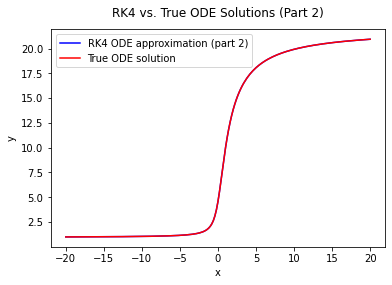

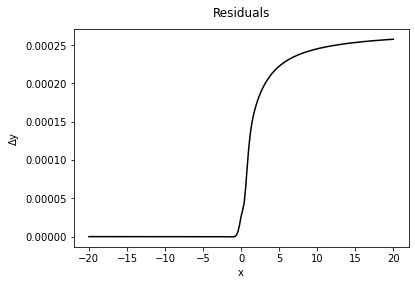

Mean of residuals 0.00011346660621000053
Standard deviation of residuals: 0.00011792118455832736

Difference between mean of residuals (part 1) and mean of residuals (part 2): 3.390539248729742e-07
Percent difference between mean of residuals (part 1) and mean of residuals (part 2): 0.0029792360456514567


In [2]:
# ----------------------- PART 1 ------------------------------------------------

def sample_ode(x,y):
    ''' Sample ODE for Problem 1 '''
    return y/(1+x**2)

def sample_solution(x):
    ''' Returns solution for sample ODE (found using WolframAlpha)
    Assuming y(-20)=1 as in Problem 1 '''
    return np.exp(np.arctan(x)+np.arctan(20))


def rk4_step(fun, x, y, h):
    ''' From PHYS 512 Lecture 5. Approximates an ODE at x=x,y=y '''
    k1 = h*fun(x, y)
    k2 = h*fun(x + h/2, y + k1/2)
    k3 = h*fun(x + h/2, y + k2/2)
    k4 = h*fun(x + h, y + k3)
    
    return y + (k1 + 2*k2 + 2*k3 + k4)/6

# Test:

nstep = 200
x = np.linspace(-20,20,nstep+1)  
h = x[1]-x[0]

y = 0*x
y[0] = 1  # Initial condition y(-20) = 1
y_pred = sample_solution(x)

for i in range(nstep):
    y[i+1] = rk4_step(sample_ode, x[i], y[i], h)

# Plot results

plt.figure(0)
plt.plot(x, y, color='blue', label='RK4 ODE approximation')
plt.plot(x, y_pred, color='red', label='True ODE solution')
plt.xlabel("x")
plt.ylabel("y")
plt.title("RK4 vs. True ODE Solutions (Part 1)", y=1.03)
plt.legend()
# plt.savefig("ode1.png",dpi=500,bbox_inches='tight')

res1 = y_pred-y
plt.figure(1)
plt.plot(x, res1, color='k')
plt.xlabel("x")
plt.ylabel(r"$\Delta$y")
plt.title("Residuals", y=1.03)
# plt.savefig("residuals1.png",dpi=500,bbox_inches='tight')

plt.show()

print("Mean of residuals",np.mean(res1))
print("Standard deviation of residuals:",np.std(res1))


# ----------------------- PART 2 ---------------------------


def rk4_stepd(fun, x, y, h):
    ''' This stepper takes one big step h, then two small steps h/2, and computes the "total" 
    solution according to the PDF I submitted along with my code'''
    
    # Big step
    y_big = rk4_step(fun, x, y, h)
    
    
    # First half-step
    y1 = rk4_step(fun, x, y, h/2)
    
    # Second half-step
    y2 = rk4_step(fun, x+h/2, y1, h/2)
    
    # Combined solution according to PDF
    y = -1/15 * y_big + 16/15 * y2
    
    return y
    
    
# Test it out
    
y_new = 0*x
y_new[0] = 1  # Initial condition y(-20) = 1

for i in range(nstep):
    y_new[i+1] = rk4_stepd(sample_ode, x[i], y[i], h)
    

# Plot it

plt.figure(2)
plt.plot(x, y_new, color='blue', label='RK4 ODE approximation (part 2)')
plt.plot(x, y_pred, color='red', label='True ODE solution')
plt.xlabel("x")
plt.ylabel("y")
plt.title("RK4 vs. True ODE Solutions (Part 2)", y=1.03)
plt.legend()
# plt.savefig("ode2.png",dpi=500,bbox_inches='tight')

res2 = y_pred-y_new
plt.figure(1)
plt.plot(x, y_pred-y_new, color='k')
plt.xlabel("x")
plt.ylabel(r"$\Delta$y")
plt.title("Residuals", y=1.03)
# plt.savefig("residuals2.png",dpi=500,bbox_inches='tight')

plt.show()

print("Mean of residuals",np.mean(res2))
print("Standard deviation of residuals:",np.std(res2))


# How much better is the answer from Part 2?
print("\nDifference between mean of residuals (part 1) and mean of residuals (part 2):", np.mean(res1) - np.mean(res2))
print("Percent difference between mean of residuals (part 1) and mean of residuals (part 2):", (np.mean(res1)-np.mean(res2))/np.mean(res1))

# Problem 2

took 296 evaluations and 0.05118560791015625 seconds to solve implicitly


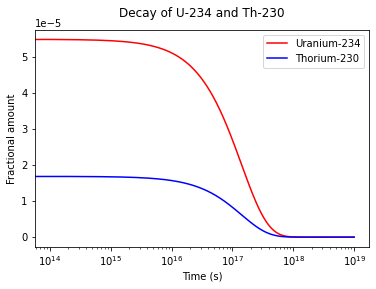

In [3]:
# Decay rates and associated element names saved in U-chain.txt file

rates = []
elements = []

with open("U-chain.txt") as f:
    l = f.readlines()
    
    for i in range(1, len(l)-1):
        
        rates.append(float(l[i].split('\t')[1]))
        elements.append(l[i].split('\t')[0])
        
    elements.append(l[-1].split('\t')[0])
    
rates = np.asarray(rates)


# Write the decay function

def fun(x,y,half_life=rates):
    ''' From Lecture 5 '''
    
    # Initialize empty array
    dydx = np.zeros(len(half_life)+1)
    
    # Fill in first value 'manually'
    dydx[0] = -y[0]/half_life[0]
    
    # Fill in middle values
    for i in range(1, len(half_life)):
        dydx[i] = y[i-1]/half_life[i-1] - y[i]/half_life[i]
    
    # Fill in last value 'manually'
    dydx[-1] = y[-2]/half_life[-1]
    
    return dydx


# Test it out!

y0 = np.zeros(len(rates)+1)
y0[0] = 1
x0 = 0
x1 = 1e19

# Make sure I get a bunch of data pts
t = np.linspace(x0,x1,100000)

# Time-stamp it like we did in class
t0 = time.time()

# Use implicit method
ans = integrate.solve_ivp(fun, [x0,x1], y0, t_eval=t, method='Radau')

t1 = time.time()

print('took', ans.nfev, 'evaluations and', t1-t0, 'seconds to solve implicitly')


# Now plot a few of them!

import matplotlib as m

cmap = m.cm.get_cmap('plasma')
norm = m.colors.Normalize(vmin=np.min(0), vmax=np.max(15))  # Get a nice colour map

'''
# Plot EVERY element:
for i,c in enumerate(np.arange(0,15)):
    plt.plot(ans.t, ans.y[int(c)], color=cmap(norm(c)), label=f'{elements[int(c)]}')
'''

plt.plot(ans.t, ans.y[3], color='red', label=f'{elements[3]}')
plt.plot(ans.t, ans.y[4], color='blue', label=f'{elements[4]}')

plt.title("Decay of U-234 and Th-230",y=1.03)
plt.legend()
#plt.yscale('symlog', linthresh=1e-2)
#plt.ylim(0.3,0.32)
#plt.xlim(0,1e19)
plt.xscale('log')
plt.ylabel("Fractional amount")
#plt.ylabel(r"$\frac{Th230}{U234}$")
plt.xlabel("Time (s)")

#plt.savefig("decay_U_to_Th.png",dpi=500,bbox_inches='tight')

plt.show()


# Problem 3

Best fit parameters: [-1.51231182e+03  4.53599028e-04 -1.94115589e-02  1.66704455e-04]


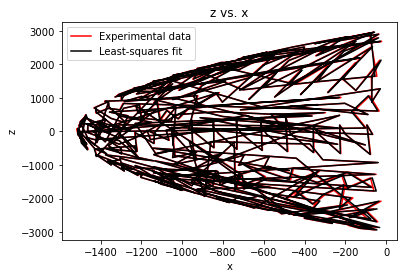

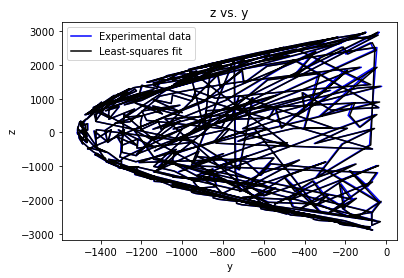

Best fit parameters (symmetric parabola): a = 0.0001667044547740133, x0 = -1.3604886221977066, y0 = 58.22147608157966, z0 = -1512.8772100367873

Error on fit parameters: [3.12018436e-01 1.25061100e-04 1.19249564e-04 6.45189976e-08]

Focal point: 1499.6599841252184 with uncertainty 0.5804077581892846


In [4]:
# Recover data from txt file

x = []
y = []
z = []
with open("dish_zenith.txt") as f:
    l = f.readlines()
    for i in range(len(l)):
        x.append(float(l[i].split(' ')[0]))
        y.append(float(l[i].split(' ')[1]))
        z.append(float(l[i].split(' ')[2]))

# Create the A matrix (matrix of coefficients)

A = np.zeros((len(x),4))

for i in range(len(x)):
    A[i,0] = 1
    A[i,1] = x[i]
    A[i,2] = y[i]
    A[i,3] = x[i]**2 + y[i]**2

# Now use numpy.linalg.lstsq to find best fit parameters

ans, res, rank, s = np.linalg.lstsq(A, z, rcond=None)

print("Best fit parameters:",ans)
# The reconstructed data is A@ans

reconstruct = A@ans

# Now plot the original data vs. the reconstructed line!

# z vs. x
plt.figure(0)
plt.plot(z, x, color='red', label='Experimental data')
plt.plot(reconstruct,x,color='k', label='Least-squares fit')
plt.ylabel('z')
plt.xlabel('x')
plt.title('z vs. x')
plt.legend()
#plt.savefig('z_vs_x.png', dpi=500, bbox_inches='tight')

# z vs. y
plt.figure(1)
plt.plot(z,y,color='blue', label='Experimental data')
plt.plot(reconstruct,y,color='k', label='Least-squares fit')
plt.ylabel('z')
plt.xlabel('y')
plt.title('z vs. y')
plt.legend()
#plt.savefig('z_vs_y.png', dpi=500, bbox_inches='tight')

plt.show()


# Now recover the standard symmetric parabola parameters
a = ans[-1]
x0 = -ans[1]/(2*a)
y0 = -ans[2]/(2*a)
z0 = ans[0] - a*x0**2 - a*y0**2

print(f"Best fit parameters (symmetric parabola): a = {a}, x0 = {x0}, y0 = {y0}, z0 = {z0}")


# Now, estimate the error on each data point --> ensemble-average over the square of the residuals

r = z - reconstruct

error_on_data = np.mean(r*r)


# Construct noise matrix

N = np.zeros((len(z),len(z)))
for i in range(len(N)):
    N[i][i] = error_on_data
    
    
# Recover error on fit parameters using linear algebra

fit_err = np.sqrt(np.diag(np.linalg.inv(A.T@np.linalg.inv(N)@A)))

print("\nError on fit parameters:", fit_err)


# Finally, solve for the focal point and its uncertainty:

f = 1/(4*a)
f_err = np.abs(-1/(4*a**2))*fit_err[-1]

print("\nFocal point:",f,"with uncertainty",f_err)